In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [182]:
#IMPORTANDO BASE DE DADOS
bd_agro = pd.read_csv('dadosteste.csv')
bd_agro
#display(bd_agro)

,bloco,talhao,area,safra,data_colheita,TCH,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,475,1,108.77,2019,2019-06-07,NaN,0.682403,0.759308,0.750978,0.770751,0.751562,0.697348,0.692488,0.521619,0.361398,0.379454,0.393329,0.449616
1,473,2,95.81,2019,2019-08-07,NaN,0.469399,0.592628,0.672298,0.747850,0.715270,0.722980,0.731796,0.731084,0.695648,0.511374,0.362315,0.423441
2,473,1,123.98,2019,2019-08-07,NaN,0.428521,0.563982,0.674662,0.770703,0.739079,0.746980,0.700396,0.671140,0.620945,0.465249,0.305978,0.300977
3,468,5,49.18,2019,2019-05-22,NaN,0.741138,0.747431,0.767039,0.580162,0.761972,0.651611,0.629768,0.460629,0.389895,0.426775,0.495159,0.507772
4,468,4,39.58,2019,2019-05-22,NaN,0.731495,0.739824,0.767489,0.576364,0.759941,0.651823,0.620141,0.411033,0.315381,0.374749,0.468938,0.485989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,240,1,43.80,2018,2018-09-02,70.929600,0.505531,0.541958,0.593755,0.670426,0.749030,0.763200,0.636833,0.736960,0.407364,0.676639,0.550063,0.534069
1902,219,2,56.51,2018,2018-08-31,91.035850,0.479797,0.545902,0.605372,0.666031,0.752323,0.787244,0.714353,0.789022,0.637088,0.722117,0.553598,0.518688
1903,474,1,32.31,2018,2018-06-24,92.629189,0.519261,0.649099,0.761562,0.801162,0.776165,0.712880,0.687334,0.559766,0.543474,0.545682,0.615032,0.628805
1904,223,1,32.72,2018,2018-09-03,60.958865,0.428690,0.443692,0.439647,0.554221,0.652509,0.695369,0.649948,0.709126,0.709535,0.604181,0.470840,0.441193


In [183]:
bd_agro.isna().sum()

bloco              0
talhao             0
area               0
safra              0
data_colheita      0
TCH              274
NDVI_b01           0
NDVI_b02           0
NDVI_b03           0
NDVI_b04           0
NDVI_b05           0
NDVI_b06           0
NDVI_b07           0
NDVI_b08           0
NDVI_b09           0
NDVI_b10           0
NDVI_b11           0
NDVI_b12           0
dtype: int64

In [184]:
bd_agro['data_colheita'].info

<bound method Series.info of 0       2019-06-07
1       2019-08-07
2       2019-08-07
3       2019-05-22
4       2019-05-22
           ...    
1901    2018-09-02
1902    2018-08-31
1903    2018-06-24
1904    2018-09-03
1905    2018-09-03
Name: data_colheita, Length: 1906, dtype: object>

In [185]:
bd_agro['TCH'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1906 entries, 0 to 1905
Series name: TCH
Non-Null Count  Dtype  
--------------  -----  
1632 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [186]:
#TRATAMENTO DE IBNFORMAÇÕES VAZIAS
valores_vazios=['-', '',' ','_','*']
bd_agro = pd.read_csv('dadosteste.csv', na_values=valores_vazios)


In [187]:
bd_agro['TCH'] = bd_agro['TCH'].fillna(0)
bd_agro['TCH']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
1901    70.929600
1902    91.035850
1903    92.629189
1904    60.958865
1905    64.047401
Name: TCH, Length: 1906, dtype: float64

In [188]:
bd_agro_sem_data=bd_agro.drop(labels="data_colheita", axis=1)
bd_agro_sem_data.info(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bloco     1906 non-null   int64  
 1   talhao    1906 non-null   int64  
 2   area      1906 non-null   float64
 3   safra     1906 non-null   int64  
 4   TCH       1906 non-null   float64
 5   NDVI_b01  1906 non-null   float64
 6   NDVI_b02  1906 non-null   float64
 7   NDVI_b03  1906 non-null   float64
 8   NDVI_b04  1906 non-null   float64
 9   NDVI_b05  1906 non-null   float64
 10  NDVI_b06  1906 non-null   float64
 11  NDVI_b07  1906 non-null   float64
 12  NDVI_b08  1906 non-null   float64
 13  NDVI_b09  1906 non-null   float64
 14  NDVI_b10  1906 non-null   float64
 15  NDVI_b11  1906 non-null   float64
 16  NDVI_b12  1906 non-null   float64
dtypes: float64(14), int64(3)
memory usage: 253.3 KB


In [189]:
safra_2019=bd_agro_sem_data.loc[bd_agro_sem_data['safra']==2019]
outras_safras = bd_agro_sem_data.loc[bd_agro_sem_data['safra']!=2019]
outras_safras

,bloco,talhao,area,safra,TCH,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
10,463,6,60.02,2018,76.739130,0.423142,0.431723,0.559972,0.592814,0.600053,0.681854,0.610406,0.569018,0.425806,0.375776,0.355070,0.406886
12,463,5,82.09,2018,99.839744,0.431270,0.542980,0.619596,0.657681,0.649257,0.743298,0.669754,0.640421,0.448287,0.381127,0.377751,0.435234
14,463,4,125.36,2018,107.347368,0.400230,0.532940,0.596022,0.687585,0.727971,0.745753,0.674152,0.647247,0.439842,0.363046,0.360681,0.430465
16,463,3,117.87,2018,43.585093,0.465889,0.542166,0.622972,0.679962,0.656445,0.651586,0.677720,0.688182,0.492534,0.415071,0.426020,0.517091
18,463,2,121.25,2018,88.750000,0.474915,0.497241,0.618744,0.650198,0.601881,0.596118,0.656673,0.668282,0.480202,0.428530,0.446913,0.539156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,240,1,43.80,2018,70.929600,0.505531,0.541958,0.593755,0.670426,0.749030,0.763200,0.636833,0.736960,0.407364,0.676639,0.550063,0.534069
1902,219,2,56.51,2018,91.035850,0.479797,0.545902,0.605372,0.666031,0.752323,0.787244,0.714353,0.789022,0.637088,0.722117,0.553598,0.518688
1903,474,1,32.31,2018,92.629189,0.519261,0.649099,0.761562,0.801162,0.776165,0.712880,0.687334,0.559766,0.543474,0.545682,0.615032,0.628805
1904,223,1,32.72,2018,60.958865,0.428690,0.443692,0.439647,0.554221,0.652509,0.695369,0.649948,0.709126,0.709535,0.604181,0.470840,0.441193


In [190]:
analise1 = outras_safras.drop(labels="bloco", axis=1)
analise2 = analise1.drop(labels="talhao", axis=1)
analise3 = analise2.drop(labels="area", axis=1)
analise4 = analise3.drop(labels="safra", axis=1)
analise4
#analise = outras_safras[['TCH'],['NDVI_b01'],['NDVI_b02'],['NDVI_b03'],['NDVI_b04'],['NDVI_b05'],['NDVI_b06'],['NDVI_b07'],['NDVI_b08'],['NDVI_b09'],['NDVI_b10'],['NDVI_b11'],['NDVI_b12']]

,TCH,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
10,76.739130,0.423142,0.431723,0.559972,0.592814,0.600053,0.681854,0.610406,0.569018,0.425806,0.375776,0.355070,0.406886
12,99.839744,0.431270,0.542980,0.619596,0.657681,0.649257,0.743298,0.669754,0.640421,0.448287,0.381127,0.377751,0.435234
14,107.347368,0.400230,0.532940,0.596022,0.687585,0.727971,0.745753,0.674152,0.647247,0.439842,0.363046,0.360681,0.430465
16,43.585093,0.465889,0.542166,0.622972,0.679962,0.656445,0.651586,0.677720,0.688182,0.492534,0.415071,0.426020,0.517091
18,88.750000,0.474915,0.497241,0.618744,0.650198,0.601881,0.596118,0.656673,0.668282,0.480202,0.428530,0.446913,0.539156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,70.929600,0.505531,0.541958,0.593755,0.670426,0.749030,0.763200,0.636833,0.736960,0.407364,0.676639,0.550063,0.534069
1902,91.035850,0.479797,0.545902,0.605372,0.666031,0.752323,0.787244,0.714353,0.789022,0.637088,0.722117,0.553598,0.518688
1903,92.629189,0.519261,0.649099,0.761562,0.801162,0.776165,0.712880,0.687334,0.559766,0.543474,0.545682,0.615032,0.628805
1904,60.958865,0.428690,0.443692,0.439647,0.554221,0.652509,0.695369,0.649948,0.709126,0.709535,0.604181,0.470840,0.441193


<Axes: >

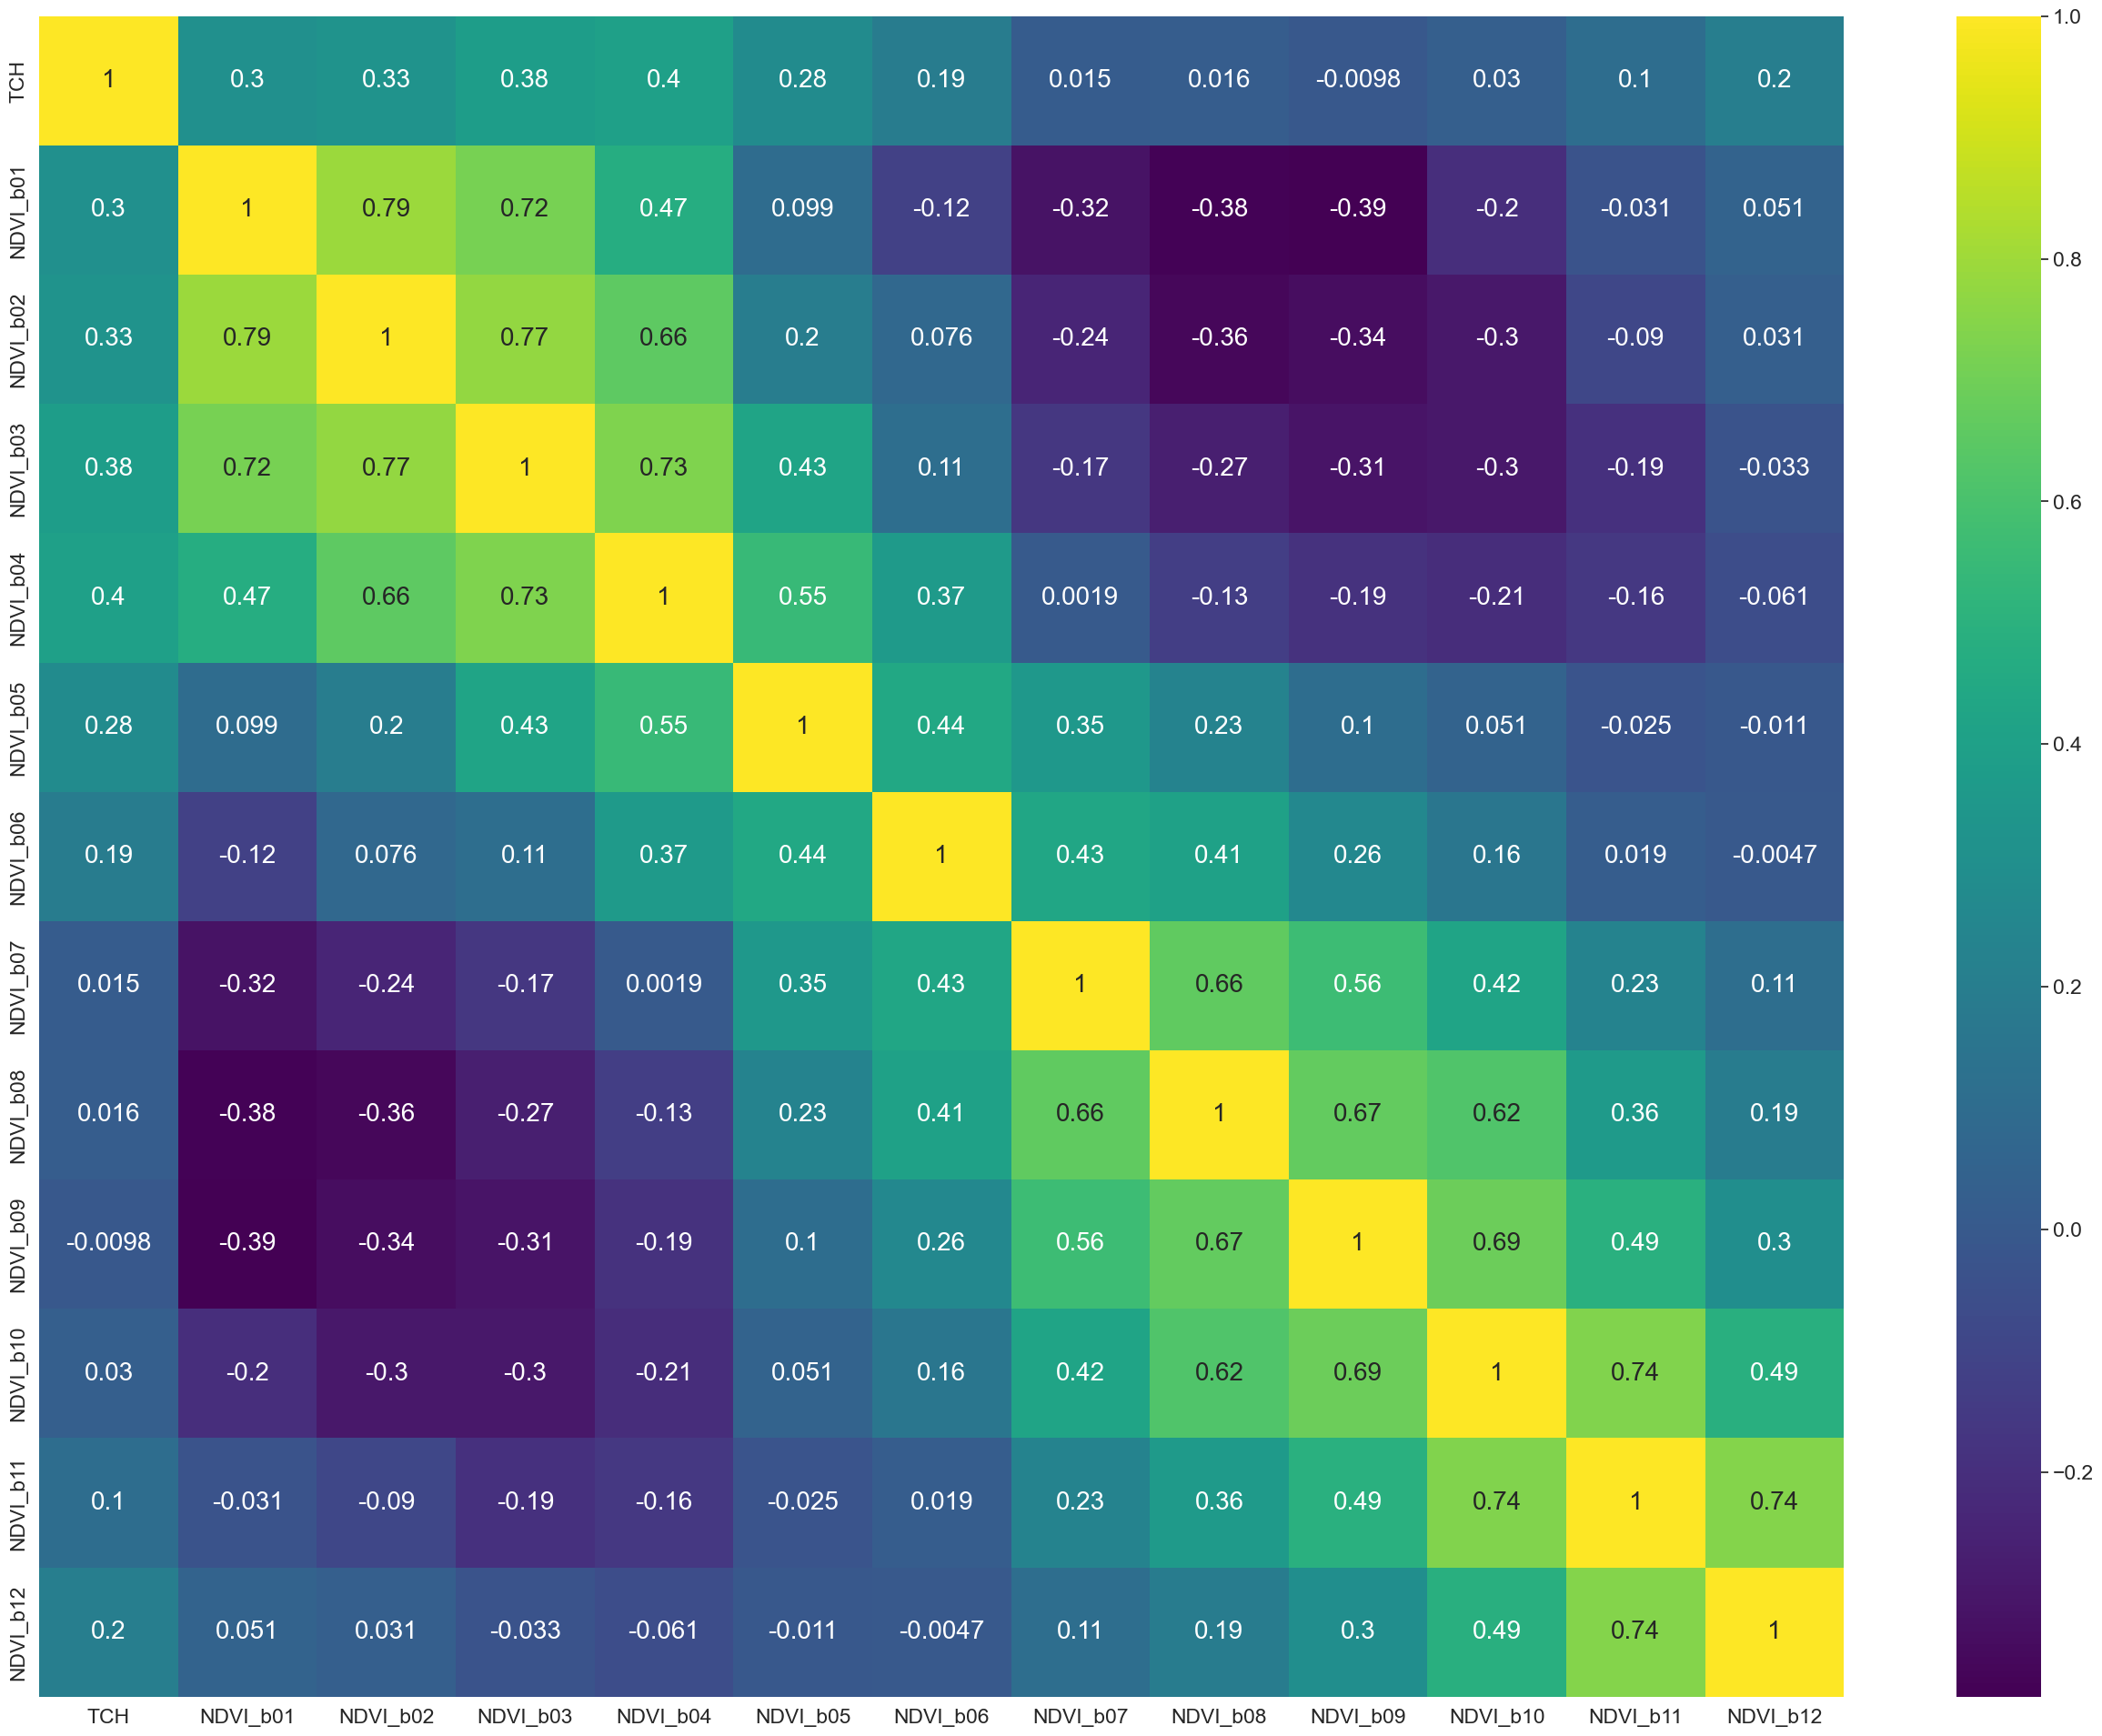

In [191]:
#Matriz de correlação
fig = pl.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 5.0)
sb.set(font_scale=1.5)
sb.heatmap(analise4.corr(), annot=True,  annot_kws={"size":20 }, cmap="viridis")

In [192]:
analise5 = analise4[['TCH','NDVI_b02','NDVI_b03','NDVI_b04']]
analise5

,TCH,NDVI_b02,NDVI_b03,NDVI_b04
10,76.739130,0.431723,0.559972,0.592814
12,99.839744,0.542980,0.619596,0.657681
14,107.347368,0.532940,0.596022,0.687585
16,43.585093,0.542166,0.622972,0.679962
18,88.750000,0.497241,0.618744,0.650198
...,...,...,...,...
1901,70.929600,0.541958,0.593755,0.670426
1902,91.035850,0.545902,0.605372,0.666031
1903,92.629189,0.649099,0.761562,0.801162
1904,60.958865,0.443692,0.439647,0.554221


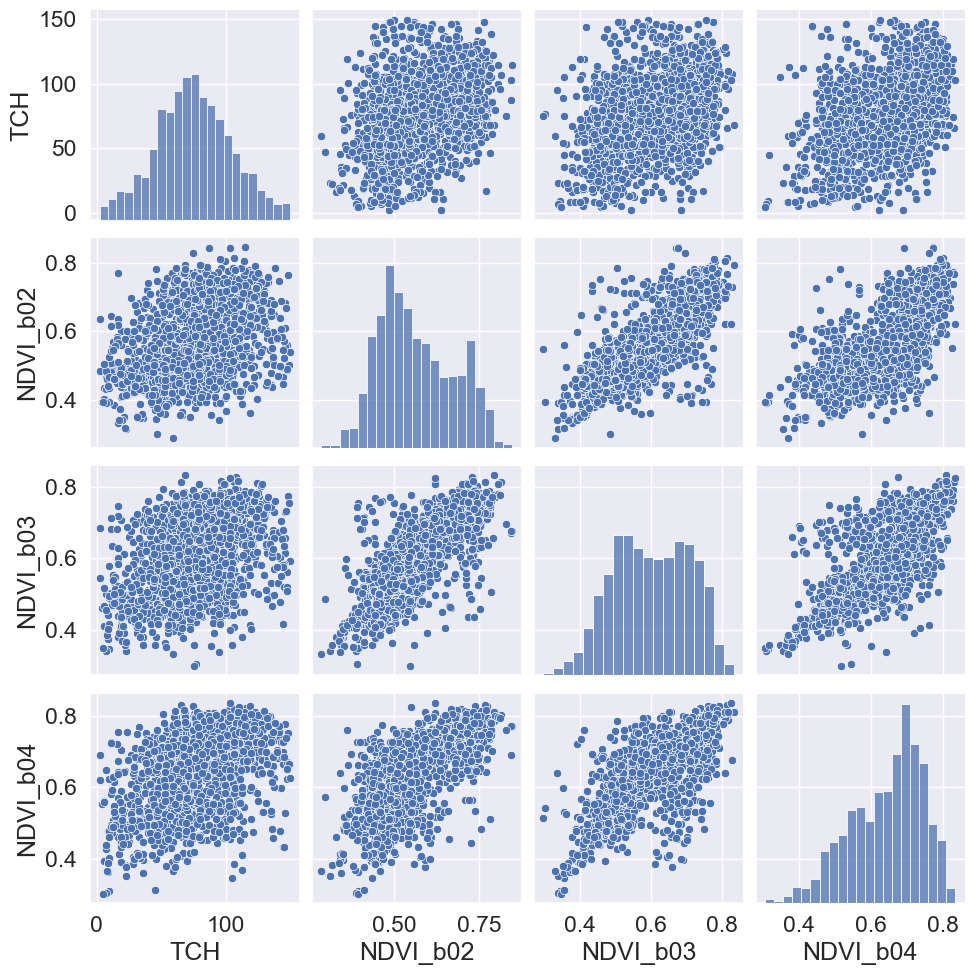

In [193]:
sb.pairplot(analise5)
pl.show()


In [194]:
#kmeans.fit(info)

In [195]:
#kmeans.labels_

In [196]:
#analise5['classes'] = kmeans.labels_
#analise5.head(10)

In [197]:
#Estatistica descritiva basica
#descritiva=info.describe()
#descritiva.head(10)

In [198]:
#Estatistica descritiva completa 
#mediana = info.median() 
#variancia = info.var() 
#media = info.mean() 
#DV= info.std()
#Assimetria =info.skew()
##curtose = info.kurtosis()
#CV= (DV/media)*100
#Minimo= info.min()
#Maximo= info.max()

#df = pd.DataFrame(zip(descritiva, mediana, variancia, media, DV, Assimetria, curtose, CV, Minimo, Maximo), columns=['Descritiva', 'mediana', 'variancia', 'media' ,'DV', 'Assimetria', 'curtose', 'CV', 'Minimo', 'Maximo'])
#df.head(50)

In [353]:
x = analise4.drop('TCH', axis=1)
y = analise4['TCH']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10, random_state=100)

In [335]:
# treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [337]:
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")

R² da Regressão Linear: 0.3304928164263895
R² do Random Forest: 0.44929119539819906


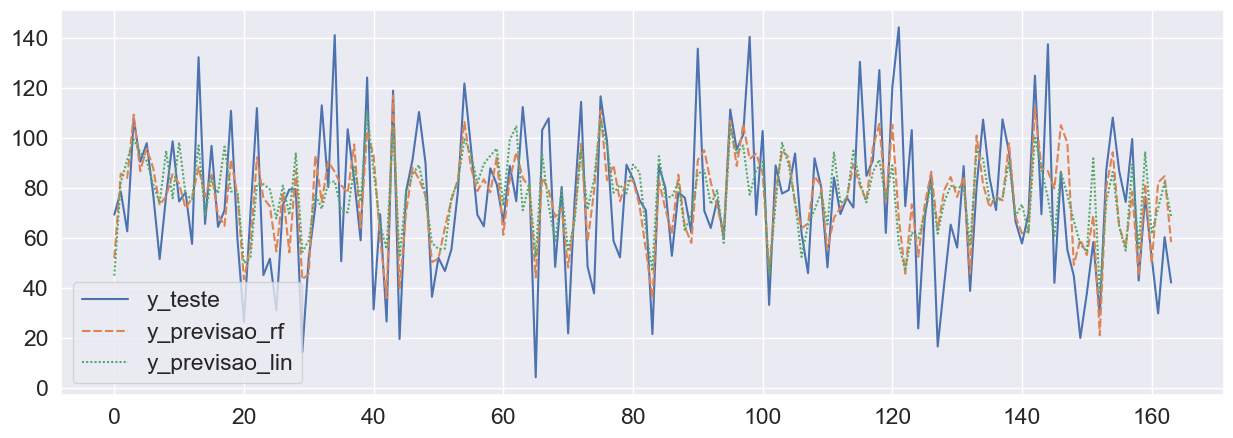

,y_teste,y_previsao_rf,y_previsao_lin
0,69.380242,52.058922,44.953379
1,78.636202,85.814188,82.249830
2,62.726115,84.067557,91.224031
3,107.850352,109.387881,99.503599
4,90.505274,86.807980,94.329503
5,97.978231,95.884849,90.890639
6,77.450117,88.010391,81.634496
7,51.610891,73.180067,74.009666
8,77.042017,76.836416,94.924881
9,98.685602,85.536695,75.913803


In [338]:
df_resultado = pd.DataFrame()

# df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin

# display(df_resultado)
df_resultado = df_resultado.reset_index(drop=True)
pl.figure(figsize=(15, 5))
sb.lineplot(data=df_resultado)
pl.show()
display(df_resultado.head(20))

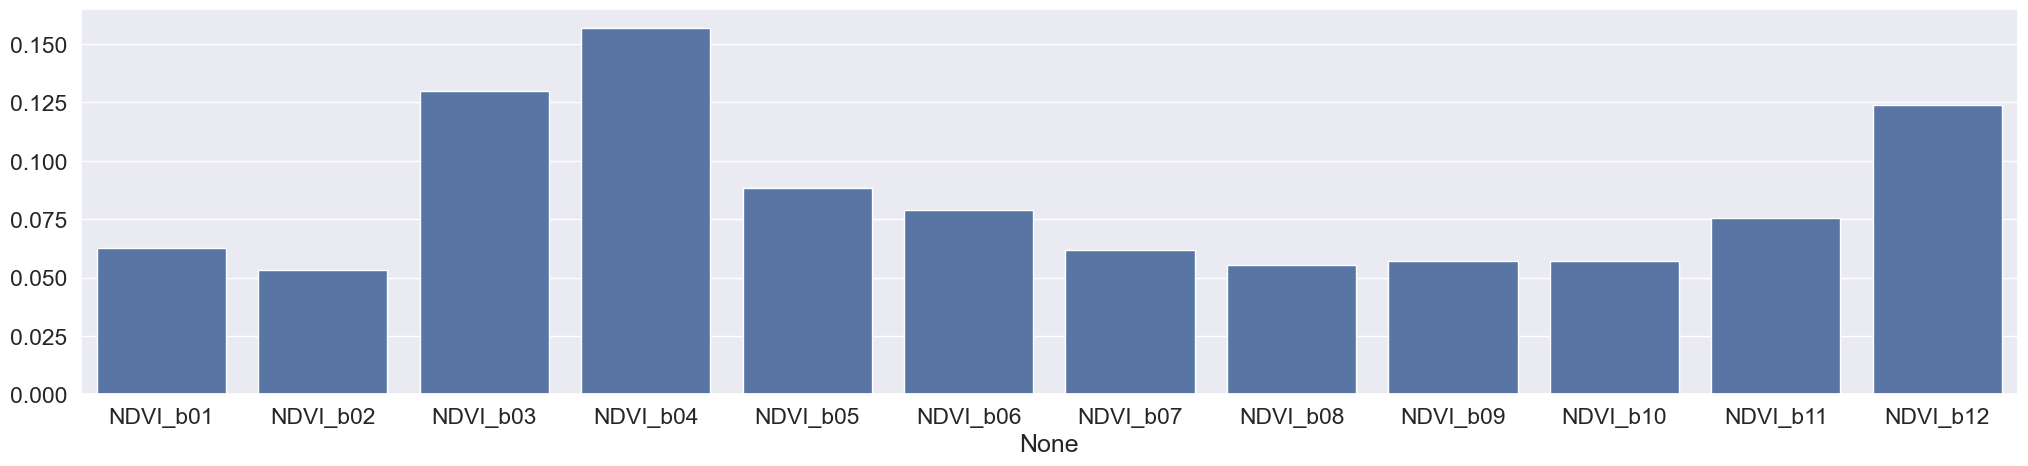

In [339]:
pl.figure(figsize=(25,5))
sb.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
pl.show()

In [351]:
rf_reg.feature_importances_

array([0.06243523, 0.0530999 , 0.12971192, 0.15703081, 0.0882159 ,
       0.07875007, 0.06174745, 0.05541082, 0.05723358, 0.0571877 ,
       0.07528349, 0.12389313])

In [359]:
safra_1 = safra_2019.drop(labels="bloco", axis=1)
safra_2  = safra_1 .drop(labels="talhao", axis=1)
safra_3  = safra_2 .drop(labels="area", axis=1)
safra_4  = safra_3 .drop(labels="safra", axis=1)
safra_4

,TCH,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,0.0,0.682403,0.759308,0.750978,0.770751,0.751562,0.697348,0.692488,0.521619,0.361398,0.379454,0.393329,0.449616
1,0.0,0.469399,0.592628,0.672298,0.747850,0.715270,0.722980,0.731796,0.731084,0.695648,0.511374,0.362315,0.423441
2,0.0,0.428521,0.563982,0.674662,0.770703,0.739079,0.746980,0.700396,0.671140,0.620945,0.465249,0.305978,0.300977
3,0.0,0.741138,0.747431,0.767039,0.580162,0.761972,0.651611,0.629768,0.460629,0.389895,0.426775,0.495159,0.507772
4,0.0,0.731495,0.739824,0.767489,0.576364,0.759941,0.651823,0.620141,0.411033,0.315381,0.374749,0.468938,0.485989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.0,0.646574,0.686413,0.691365,0.641561,0.640327,0.474955,0.578015,0.471346,0.378170,0.367619,0.453014,0.487394
399,0.0,0.610348,0.636207,0.643427,0.606883,0.600883,0.470353,0.509756,0.437162,0.366271,0.348088,0.421239,0.456834
400,0.0,0.628287,0.651012,0.653879,0.635426,0.619584,0.502318,0.541027,0.459068,0.381929,0.367744,0.438572,0.472849
401,0.0,0.561317,0.611405,0.674954,0.662746,0.665600,0.525441,0.595787,0.593090,0.375706,0.471425,0.384695,0.375208


In [364]:
x1 = safra_4.drop('TCH', axis=1)
y1 = safra_4['TCH']
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10, random_state=100)

In [375]:
tch=rf_reg.predict(x1)

In [385]:
#result = pd.concat([TCH, y1], axis=1, sort=False)
df_resultados = pd.DataFrame()

# df_resultado.index = x_test
#df_resultado['y_teste'] = y_test
df_resultados['y_previsao_rf'] = tch
#df_resultado['y_previsao_lin'] = test_pred_lin

# display(df_resultado)
#df_resultado = df_resultado.reset_index(drop=True)
#pl.figure(figsize=(15, 5))
#sb.lineplot(data=df_resultado)
pl.show()
display(df_resultados)

,y_previsao_rf
0,97.378939
1,77.577104
2,80.576429
3,100.197362
4,99.277738
...,...
269,80.916386
270,85.433371
271,89.447324
272,83.169394


In [396]:
x1
#Resultado = pd.concat([df_resultados, x1], axis=1, sort=False)
#Resultado

,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,0.682403,0.759308,0.750978,0.770751,0.751562,0.697348,0.692488,0.521619,0.361398,0.379454,0.393329,0.449616
1,0.469399,0.592628,0.672298,0.747850,0.715270,0.722980,0.731796,0.731084,0.695648,0.511374,0.362315,0.423441
2,0.428521,0.563982,0.674662,0.770703,0.739079,0.746980,0.700396,0.671140,0.620945,0.465249,0.305978,0.300977
3,0.741138,0.747431,0.767039,0.580162,0.761972,0.651611,0.629768,0.460629,0.389895,0.426775,0.495159,0.507772
4,0.731495,0.739824,0.767489,0.576364,0.759941,0.651823,0.620141,0.411033,0.315381,0.374749,0.468938,0.485989
...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.646574,0.686413,0.691365,0.641561,0.640327,0.474955,0.578015,0.471346,0.378170,0.367619,0.453014,0.487394
399,0.610348,0.636207,0.643427,0.606883,0.600883,0.470353,0.509756,0.437162,0.366271,0.348088,0.421239,0.456834
400,0.628287,0.651012,0.653879,0.635426,0.619584,0.502318,0.541027,0.459068,0.381929,0.367744,0.438572,0.472849
401,0.561317,0.611405,0.674954,0.662746,0.665600,0.525441,0.595787,0.593090,0.375706,0.471425,0.384695,0.375208


In [409]:
df_resultados.isna().sum()

y_previsao_rf    0
dtype: int64

In [414]:
safra_19 = pd.read_excel('safra_19.xlsx')

safra_19

,bloco,talhao,area,safra,data_colheita,TCH,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,475,1,108.77,2019,2019-06-07,NaN,0.682403,0.759308,0.750978,0.770751,0.751562,0.697348,0.692488,0.521619,0.361398,0.379454,0.393329,0.449616
1,473,2,95.81,2019,2019-08-07,NaN,0.469399,0.592628,0.672298,0.747850,0.715270,0.722980,0.731796,0.731084,0.695648,0.511374,0.362315,0.423441
2,473,1,123.98,2019,2019-08-07,NaN,0.428521,0.563982,0.674662,0.770703,0.739079,0.746980,0.700396,0.671140,0.620945,0.465249,0.305978,0.300977
3,468,5,49.18,2019,2019-05-22,NaN,0.741138,0.747431,0.767039,0.580162,0.761972,0.651611,0.629768,0.460629,0.389895,0.426775,0.495159,0.507772
4,468,4,39.58,2019,2019-05-22,NaN,0.731495,0.739824,0.767489,0.576364,0.759941,0.651823,0.620141,0.411033,0.315381,0.374749,0.468938,0.485989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,17,3,90.27,2019,2019-05-17,NaN,0.646574,0.686413,0.691365,0.641561,0.640327,0.474955,0.578015,0.471346,0.378170,0.367619,0.453014,0.487394
270,17,2,113.51,2019,2019-05-17,NaN,0.610348,0.636207,0.643427,0.606883,0.600883,0.470353,0.509756,0.437162,0.366271,0.348088,0.421239,0.456834
271,17,1,41.34,2019,2019-05-17,NaN,0.628287,0.651012,0.653879,0.635426,0.619584,0.502318,0.541027,0.459068,0.381929,0.367744,0.438572,0.472849
272,16,1,31.34,2019,2019-07-12,NaN,0.561317,0.611405,0.674954,0.662746,0.665600,0.525441,0.595787,0.593090,0.375706,0.471425,0.384695,0.375208


In [421]:
Resultado = pd.concat([df_resultados, safra_19], axis=1, sort=False)
Resultado.head(20)

,y_previsao_rf,bloco,talhao,area,safra,data_colheita,TCH,NDVI_b01,NDVI_b02,NDVI_b03,NDVI_b04,NDVI_b05,NDVI_b06,NDVI_b07,NDVI_b08,NDVI_b09,NDVI_b10,NDVI_b11,NDVI_b12
0,97.378939,475,1,108.77,2019,2019-06-07,NaN,0.682403,0.759308,0.750978,0.770751,0.751562,0.697348,0.692488,0.521619,0.361398,0.379454,0.393329,0.449616
1,77.577104,473,2,95.81,2019,2019-08-07,NaN,0.469399,0.592628,0.672298,0.747850,0.715270,0.722980,0.731796,0.731084,0.695648,0.511374,0.362315,0.423441
2,80.576429,473,1,123.98,2019,2019-08-07,NaN,0.428521,0.563982,0.674662,0.770703,0.739079,0.746980,0.700396,0.671140,0.620945,0.465249,0.305978,0.300977
3,100.197362,468,5,49.18,2019,2019-05-22,NaN,0.741138,0.747431,0.767039,0.580162,0.761972,0.651611,0.629768,0.460629,0.389895,0.426775,0.495159,0.507772
4,99.277738,468,4,39.58,2019,2019-05-22,NaN,0.731495,0.739824,0.767489,0.576364,0.759941,0.651823,0.620141,0.411033,0.315381,0.374749,0.468938,0.485989
5,98.877353,468,3,61.38,2019,2019-05-22,NaN,0.758227,0.763782,0.766416,0.553745,0.782921,0.590853,0.659716,0.466268,0.345031,0.451099,0.517822,0.507652
6,77.542840,464,3,60.56,2019,2019-05-06,NaN,0.667383,0.741771,0.592049,0.733495,0.664589,0.664214,0.510332,0.422210,0.496321,0.565456,0.600507,0.559664
7,88.025841,464,2,79.12,2019,2019-05-06,NaN,0.684474,0.758803,0.614511,0.736995,0.670889,0.691901,0.515743,0.430748,0.518544,0.603680,0.648257,0.567848
8,75.275497,464,1,124.61,2019,2019-05-06,NaN,0.680032,0.746286,0.610911,0.717225,0.630382,0.654919,0.477820,0.397485,0.467783,0.556054,0.614147,0.539844
9,47.161840,463,6,60.02,2019,2019-08-03,NaN,0.370205,0.455647,0.473401,0.641140,0.669810,0.539912,0.624399,0.577129,0.515041,0.389988,0.321604,0.305866


In [445]:
Resultado_Fim = Resultado[['bloco','y_previsao_rf']]
Resultado_Fim

,bloco,y_previsao_rf
0,475,97.378939
1,473,77.577104
2,473,80.576429
3,468,100.197362
4,468,99.277738
...,...,...
269,17,80.916386
270,17,85.433371
271,17,89.447324
272,16,83.169394


In [446]:
Resultado_Fim['bloco']

0      475
1      473
2      473
3      468
4      468
      ... 
269     17
270     17
271     17
272     16
273     13
Name: bloco, Length: 274, dtype: int64

In [447]:
Resultado_Fim['y_previsao_rf']

0       97.378939
1       77.577104
2       80.576429
3      100.197362
4       99.277738
          ...    
269     80.916386
270     85.433371
271     89.447324
272     83.169394
273     86.946375
Name: y_previsao_rf, Length: 274, dtype: float64

In [457]:
ACABOU= Resultado_Fim.groupby('bloco').mean()
ACABOU.head(200)

,y_previsao_rf
bloco,
13,86.946375
16,83.169394
17,83.574473
19,88.404997
20,83.129694
...,...
463,63.271918
464,80.281393
468,99.450818
